# Test equivalence between classic KNN and GVG_CNR model


We will make a small 2D example out of iris dataset for verifying that the C++ implementation of GVG_CNR model work equivalently as a KNN under particular settings.



In [1]:
# import necessasary packages

import os
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

root = os.getcwd() # define a root directory

In [2]:
# loading data
X_, y_ = load_iris()['data'],  load_iris()['target']
print(X_.shape)
print(y_)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


There are (0, 1, 2) 3 different labels. To make it simple, we pick 20 pieces of 0 and 20 pieces of 1. 

Concerning the second dimension we will pick two of them for easier visualization. 

In [3]:
# We pick 
X = X_[30:70, :2]
y = y_[30:70]
print("The first point is ", X[0])
print("The labels are", y)

The first point is  [4.8 3.1]
The labels are [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [4]:
# we split the data into training and testing. Since y is sorted, we can just pick consequtive numbers.
training_zero = range(15)
training_one = range(25, 40)
testing_zero = range(15, 20)
testing_one = range(20, 25)
testing = range(15, 25)

We visualize using a scatter plot. 

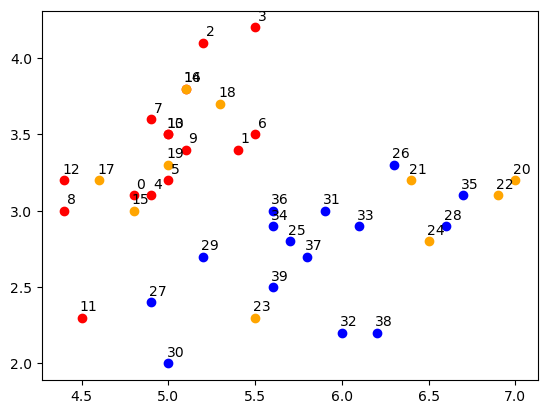

In [5]:
import matplotlib.pyplot as plt

def show_scatter():
    training_zero_color = 'r' # red
    training_one_color = 'b' # blue
    testing_color = 'orange'


    # plt.scatter(X[:15, 0], X[:15, 1], color='r')
    # plt.scatter(X[25:, 0], X[25:, 1], color='b')
    # plt.scatter(X[15:25, 0], X[15:25, 1], color='orange')


    plt.scatter(X[training_zero, 0], X[training_zero, 1]   , color=training_zero_color)
    plt.scatter(X[training_one, 0] , X[training_one, 1]    , color=training_one_color)
    plt.scatter(X[testing, 0]       , X[testing, 1]          , color=testing_color)


    # annotate the points so that we see their index by their side
    labels = range(40)

    for i, label in enumerate(labels):
        plt.annotate(label, (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

    plt.show()
    
show_scatter()

In [6]:
# make sure the distance function is working correctly
df = pd.DataFrame(np.concatenate([y.reshape((40, 1)), X], axis=1))

distmatrix = np.zeros((40, 40), dtype=float)
for i in range(40):
    for j in range(40):
        distmatrix[i, j] = (X[i, 0]-X[j, 0])**2 + (X[i, 1]-X[j, 1])**2

# Generating data for C++ code
Need phi_file, v_predefined_file and w_file
<a id='Graphfile'></a>
## Graph file, weight file and v predefined file
<a href=#TableOfContent> Back to Table of Content </a>

In [7]:
# calculate the distance between individuals

distmatrix = np.zeros((40, 40), dtype=float)
for i in range(40):
    for j in range(40):
        distmatrix[i, j] = (X[i, 0]-X[j, 0])**2 + (X[i, 1]-X[j, 1])**2
        

[15, 0, 4, 17, 5, 19, 8, 12, 9, 29, 10, 13, 7, 27, 1, 11, 36, 34, 14, 16, 6, 18, 25, 39, 23, 30, 37, 31, 2, 33, 3, 32, 26, 38, 21, 24, 28, 35, 22, 20]
--------------------------------------------------------
The first 0 elements, [] are ready. Inspecting the incoming element 15
The inspected element is in testing data, so it is removed from the list.
New asort is [0, 4, 17, 5, 19, 8, 12, 9, 29, 10, 13, 7, 27, 1, 11, 36, 34, 14, 16, 6, 18, 25, 39, 23, 30, 37, 31, 2, 33, 3, 32, 26, 38, 21, 24, 28, 35, 22, 20]
--------------------------------------------------------
The first 0 elements, [] are ready. Inspecting the incoming element 0
The inspected element is in training data, so it is kept in the list.
New asort is [0, 4, 17, 5, 19, 8, 12, 9, 29, 10, 13, 7, 27, 1, 11, 36, 34, 14, 16, 6, 18, 25, 39, 23, 30, 37, 31, 2, 33, 3, 32, 26, 38, 21, 24, 28, 35, 22, 20]
--------------------------------------------------------
The first 1 elements, [0] are ready. Inspecting the incoming element 4
Th

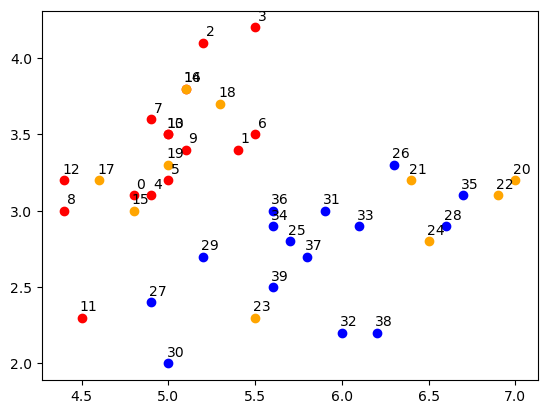

In [8]:
# verify that distance matrix is consistent with visual inspection, by checking the closest individuals.

i = 15 # the test data. Change it to anything from 15 to 25 (excluded)

asort = (np.argsort(distmatrix[i])) # this sort the individuals according to their distance-to-i

# should consider the first 5 elements that are not testing

asort = list(asort)
print(asort)

# we make sure that first j individuals (0, 1, ..., j-1) are in testing data.

j = 0 # initialize
while j < 5:
    print("--------------------------------------------------------")
    print(f"The first {j} elements, {asort[:j]} are ready.", "Inspecting the incoming element", asort[j])
    if asort[j] in range(15, 25): # if in testing, then we shouldn't include.
        asort.pop(j)
        print("The inspected element is in testing data, so it is removed from the list.")
        print("New asort is", asort)
    else:
        print("The inspected element is in training data, so it is kept in the list.")
        print("New asort is", asort)
        j+=1
    
print("---------------------Finished------------------------------")
print(f"For {i}, The first 5 closest elements are {asort[:5]}")
show_scatter()

# Creating data file to be run on C++ code.

In [9]:
# create the weight file uniform, i.e. the weighted adjacency matrix of the (fully-connected) network, where each row is an instance.
def create_weightfile_uniform(df, filename, overwrite=False):
    weightfile = pd.DataFrame(index=range(df.shape[0]), columns=range(df.shape[0]), dtype=np.int8)
    weightfile.iloc[:, :] = 1
    np.fill_diagonal(weightfile.values, 0)
    weightfile.to_csv(filename, header=False, index=False, sep= ' ', float_format='%.0f')

    
create_weightfile_uniform(df, os.path.join(root, "data2run", "iris_weight.txt"), overwrite=True)

In [10]:
# create the graph file, i.e. the adjacency matrix of the (fully-connected) network, where each row is an instance.
def create_graphfile(df, filename):
    graphfile = pd.DataFrame(index=range(df.shape[0]), columns=range(df.shape[0]), dtype=np.int8)
    graphfile.iloc[:, :] = 1
    np.fill_diagonal(graphfile.values, 0)
    graphfile.to_csv(filename, header=False, index=False, sep= ' ', float_format='%.0f')

    
create_graphfile(df, os.path.join(root, "data2run", "iris_graph.txt"))


In [11]:
def create_v_predefined(df, filename, testing): # percentage of test data vs all data
    # turn indices from testing into -1
    v_predefined = (df.iloc[:, 0]).copy() # the labels
    for i in testing:
        v_predefined[i] = -1
    v_predefined.to_csv(filename, header=False, index=False, sep=' ', float_format='%.0f')
        
        
create_v_predefined(df, os.path.join(root, "data2run", "iris_v_predefined.txt"), 
                    list(range(15, 25))

SyntaxError: unexpected EOF while parsing (2469908112.py, line 10)

# Generating phi file

We replicate the same process before where we found the first K nearest neighbors, for each i in testing.

In [ ]:
phi_matrix = np.zeros((40, 40))

for i in range(15, 25):
    print("testing dataset")
    asort = (np.argsort(distmatrix[i]))
    # should consider the first 5 elements that are not testing
    asort = list(asort)
    j = 0
    while j < 5:
        if asort[j] in range(15, 25):
            asort.pop(j)
        else:
            j+=1
    print(f"For {i}, The first 5 closest elements are {asort[:5]}")
    phi_matrix[i, asort[:3]] = 1
pd.DataFrame(phi_matrix).to_csv(os.path.join(root, "data2run", "iris_phi.txt"), 
                                header=False, index=False, float_format='%.0f', sep=' ')

In [12]:
##################################################################
#
# Prototype of code to rune the numerical tests using a C++
# compiled code (Project1.exe) which contains the GVG-CNC model.
#
# Project1.exe requires the following input arguments:
#
# N: number of indivituals (N = 40);
# F: number of items (F = 1);
# Model Specification: For direct voting Model Specification = 4;
# SW : Boolean (NE = 1 implies no Nash equilibrium constraints);
# LI : Boolean (LI = 0 implies no LI constraints);
# SC: Boolean (SC = 0 implies no symmetry constraints);
# ThetaRange: a value between 0 and 1 to shrink the feasibility range for theta;
# Filename for Phi;
# Filename for v;
# Filename for W;
##################################################################

command = 'Project1.exe 40 1 4 1 0 0 0 1 "iris_phi.txt" "iris_v_predefined.txt" "iris_weight.txt"'
print(command)

Project1.exe 40 1 4 1 0 0 0 1 "iris_phi.txt" "iris_v_predefined.txt" "iris_weight.txt"


In [ ]:
##################################################################
# The file "output_solution.txt" is generated when
# running run(command, print_=True) from the previous cell.
# This file will be renamed and moved to the 'results' folder.
##################################################################